In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
heart = pd.read_csv("/content/drive/MyDrive/archive.zip")
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
# using info() method to get the concise summary of the dataframe.
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [ ]:
# creating a copy of dataset so that will not affect our original dataset.
heart_df = heart.copy()

In [ ]:
# Renaming the column 
heart_df = heart_df.rename(columns={'condition':'target'})
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Let's check if there is any Null value using isnull() method
heart_df.isnull().values.any()

False

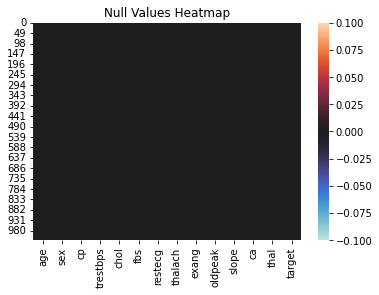

In [ ]:
## this is the visual representation of null values present in data
sns.heatmap(heart_df.isnull(),cmap="icefire")
plt.title('Null Values Heatmap')
plt.show()

In [ ]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default.
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Exploratory Data analysis and visualisation

Distribution of target variable

In [ ]:
heart_df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
# Percentage of patients have and do not have heart disease
heart_df['target'].value_counts()/heart_df.shape[0]*100

1    51.317073
0    48.682927
Name: target, dtype: float64

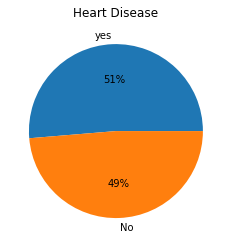

In [ ]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = heart_df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

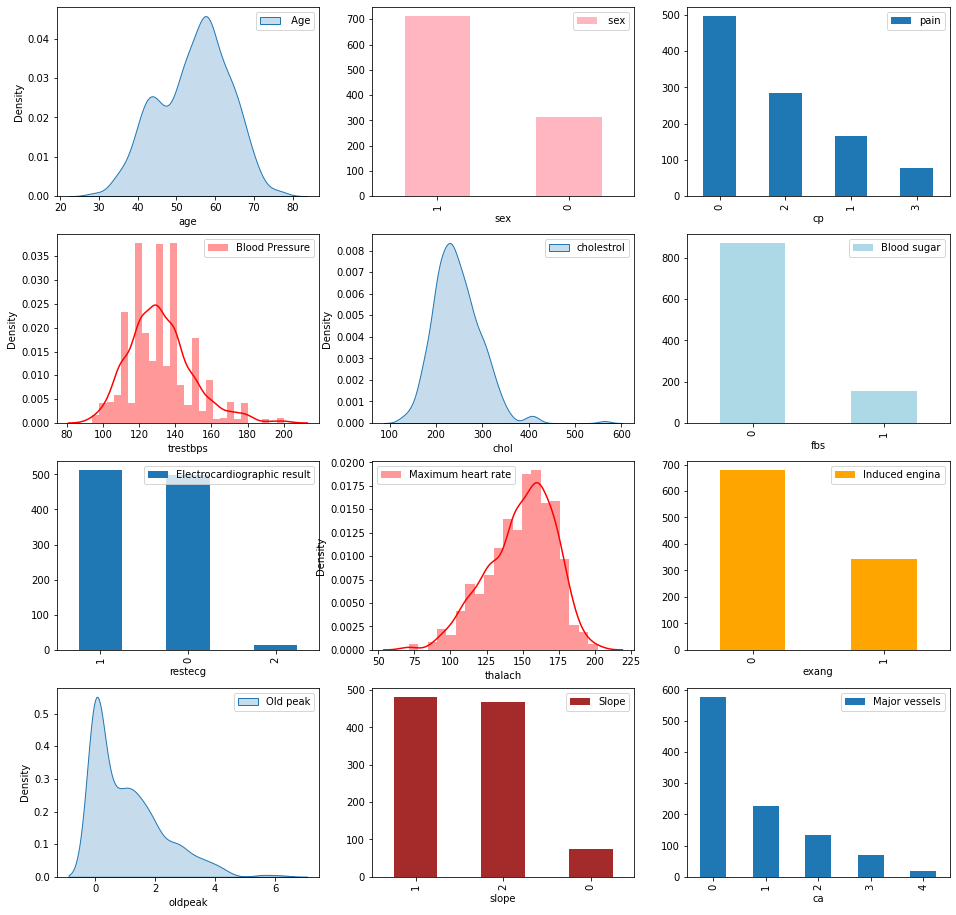

In [ ]:

fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(heart_df['age'],shade=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(432)
heart_df['sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(433)
heart_df['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(heart_df['trestbps'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(heart_df['chol'],shade=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(436)
heart_df['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(437)
heart_df['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('restecg')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.distplot(heart_df['thalach'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(439)
heart_df['exang'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')
# plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(heart_df['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
heart_df['slope'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
heart_df['ca'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

Distribution of features w.r.t target

Age distribution based on heart disease

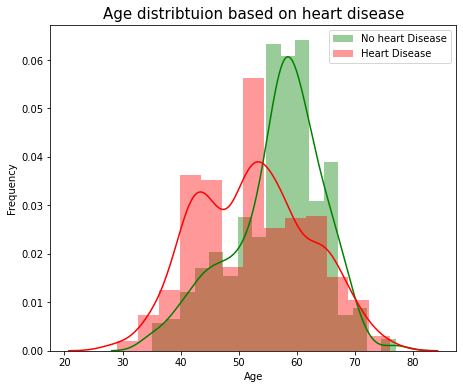

In [ ]:
fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(heart_df[heart_df['target'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(heart_df[heart_df['target'] == 1]["age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()

In [ ]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.569138276553105


In [ ]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', heart_df[heart_df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  29
Max age of people who have heart disease:  76
Average age of people who have heart disease:  52.40874524714829


Heart disease frequency according to chest pain types

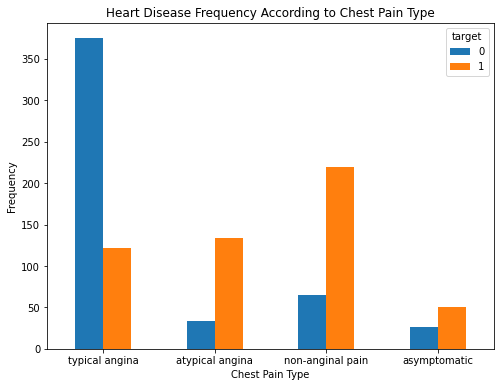

In [ ]:
pd.crosstab(heart_df.cp,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

Blood pressure distribution based on heart rate

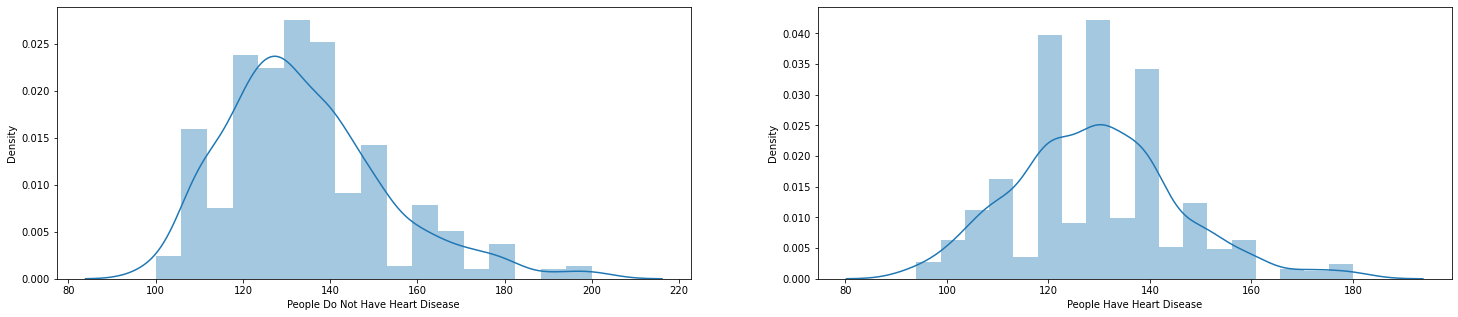

In [ ]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  100
Max blood pressure of people who do not have heart disease:  200
Average blood pressure of people who do not have heart disease:  134.1062124248497


In [ ]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', heart_df[heart_df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  180
Average blood pressure of people who have heart disease:  129.24524714828897


Cholesterol distribution based on heart disease

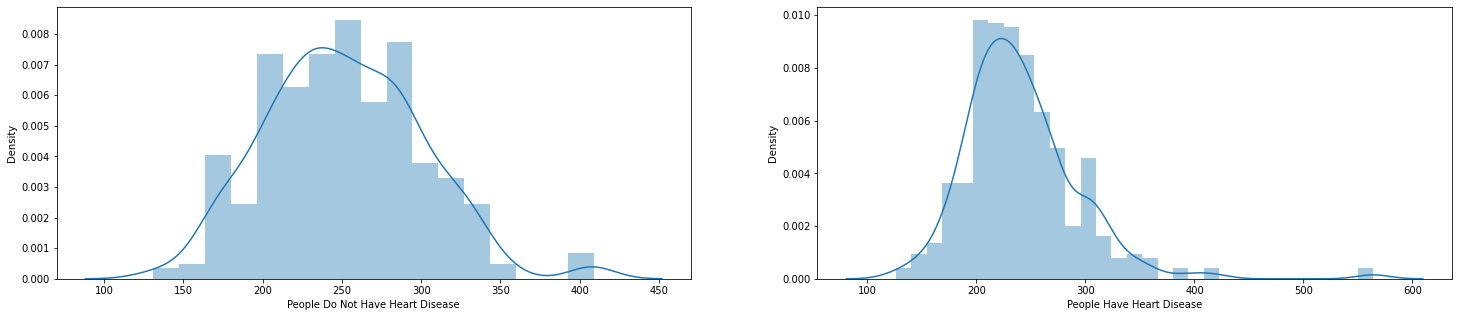

In [ ]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  131
Max cholestoral of people who do not have heart disease:  409
Average cholestoral of people who do not have heart disease:  251.2925851703407


In [ ]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', heart_df[heart_df['target'] == 1]['chol'].mean())


Min cholestoral of people who have heart disease:  126
Max cholestoral of people who have heart disease:  564
Average cholestorale of people who have heart disease:  240.97908745247148


Heart Disease Frequency According to Fasting Blood Sugar

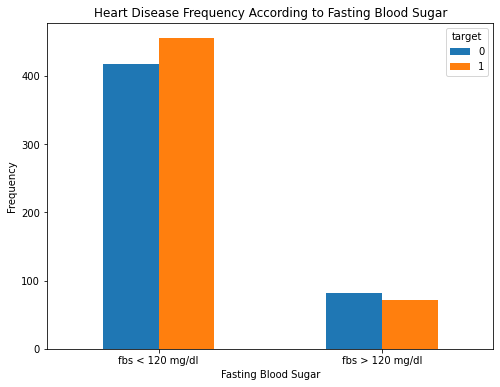

In [ ]:
pd.crosstab(heart_df.fbs,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

Heart Disease Frequency According to Resting Electrocardiographic Results

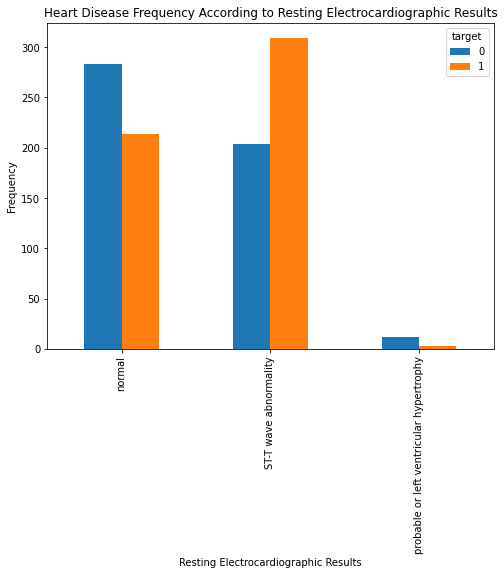

In [ ]:
pd.crosstab(heart_df.restecg,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

Maximum heart rate distribution based on heart disease

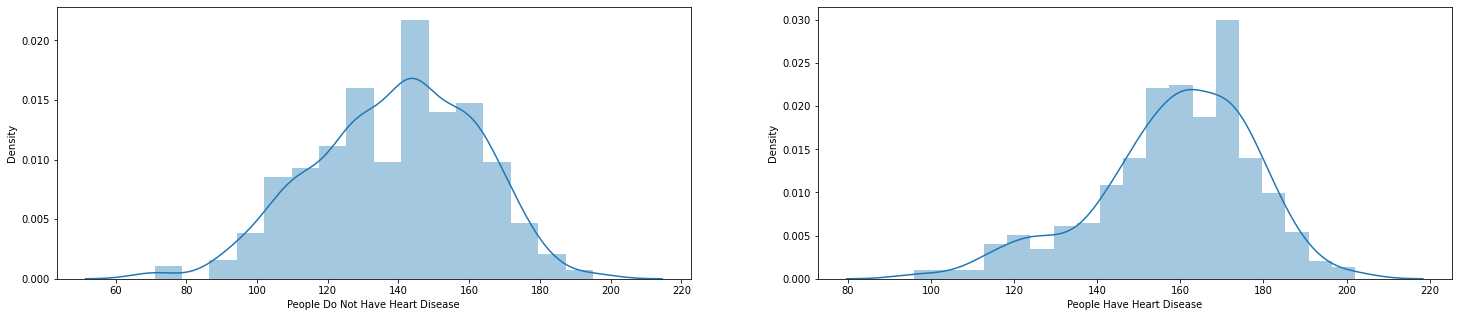

In [ ]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

ST depression distribution based on heart disease

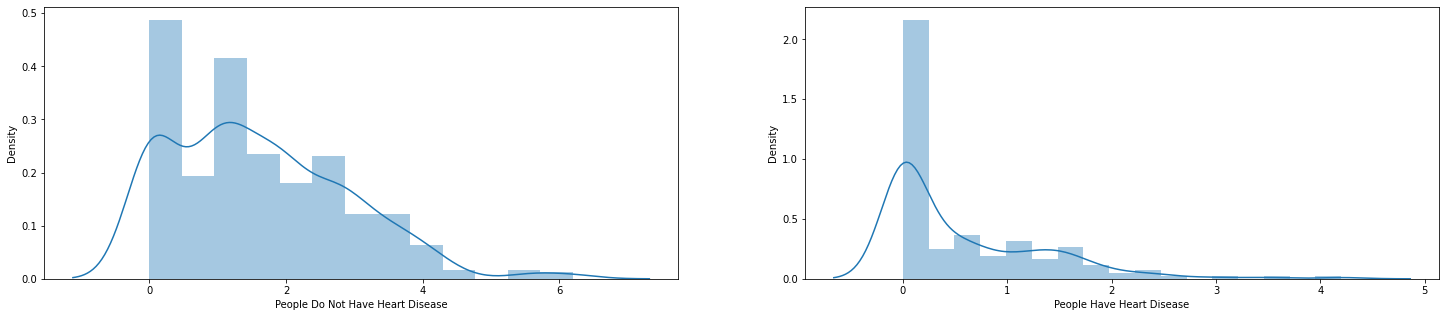

In [ ]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  6.2
Average ST depression of people who do not have heart disease:  1.6002004008016033


In [ ]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', heart_df[heart_df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  4.2
Average ST depression of people not have heart disease:  0.5699619771863118


Heart Disease Frequency According to Exercise Induced Angina

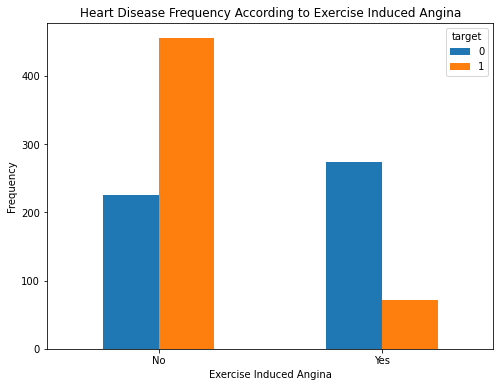

In [ ]:
pd.crosstab(heart_df.exang,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

Slope of the peak exercise ST segment based on the target

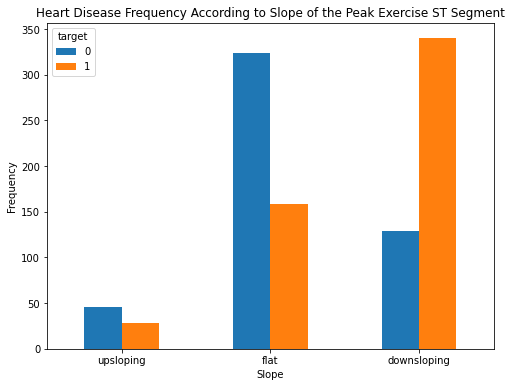

In [ ]:
pd.crosstab(heart_df.slope,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

Number of vessels based on the target

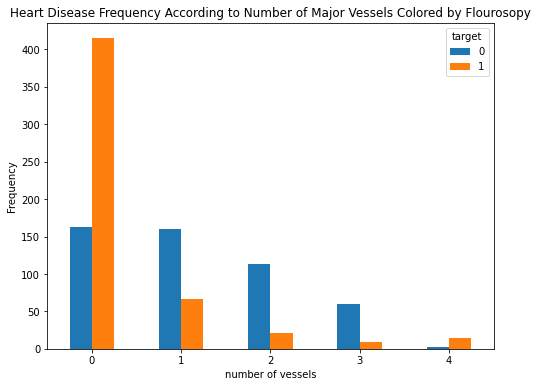

In [ ]:
pd.crosstab(heart_df.ca,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

Heart Disease Frequency According to Thalassemia

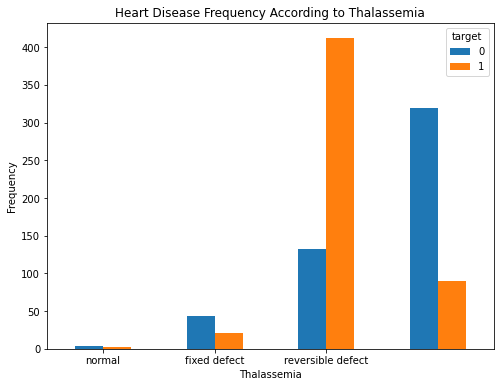

In [ ]:
pd.crosstab(heart_df.thal,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

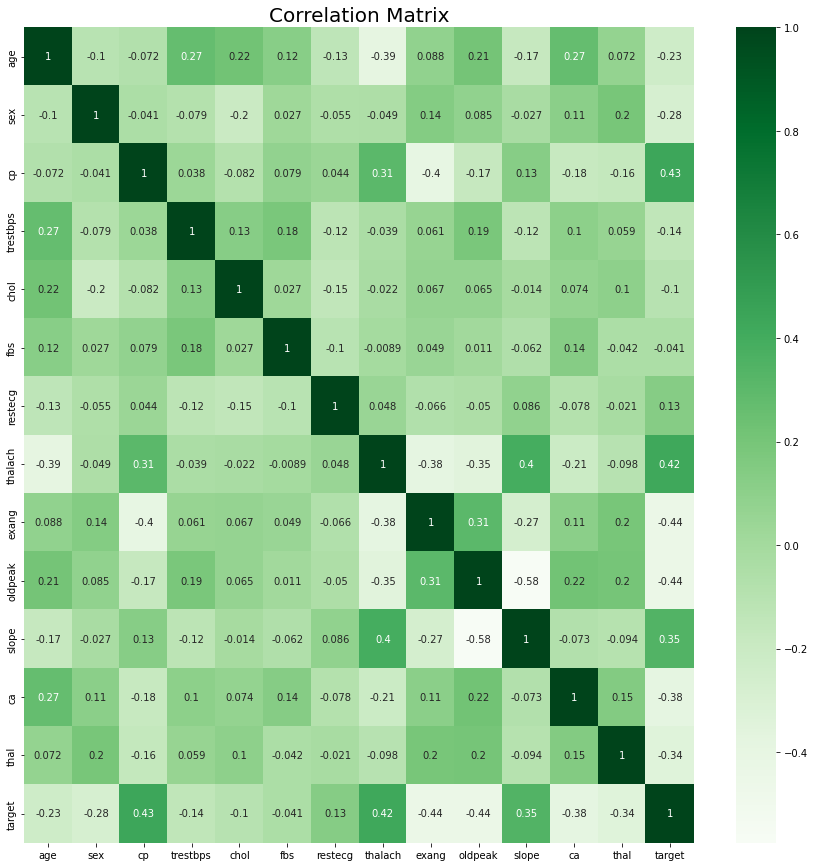

In [ ]:
# Correlation map
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(heart_df.corr(), annot = True, cmap = "Greens")
plt.show()

In [ ]:
#fixing our data in x and y. Here y contains target data and X contains rest all the features.
x= heart_df.drop(columns= 'target')
y= heart_df.target

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (768, 13), X_test size: (257, 13)


In [ ]:
#feature scaling
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

Logistic Regression Model

In [ ]:
# creating Logistic Regression Model
LR_model= LogisticRegression()
LR_model.fit(x_train_scaler, y_train)
y_pred_LR= LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler,y_test)

0.7859922178988327

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       132
           1       0.73      0.88      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.79      0.78       257
weighted avg       0.80      0.79      0.78       257

Accuracy: 78.6%



In [ ]:
cm = confusion_matrix(y_test, y_pred_LR)
cm

array([[ 92,  40],
       [ 15, 110]])

K-nearest-neighbor classifier

In [ ]:
# creating Knn Model
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(x_train_scaler, y_train)
y_pred_knn= Knn_model.predict(x_test_scaler)
Knn_model.score(x_test_scaler,y_test)

0.8326848249027238

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       132
           1       0.80      0.88      0.84       125

    accuracy                           0.83       257
   macro avg       0.84      0.83      0.83       257
weighted avg       0.84      0.83      0.83       257

Accuracy: 83.27%



In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[104,  28],
       [ 15, 110]])

Support Vector Classifier

In [ ]:
SVC_model= SVC()
SVC_model.fit(x_train_scaler, y_train)
y_pred_SVC= SVC_model.predict(x_test_scaler)
SVC_model.score(x_test_scaler,y_test)

0.9027237354085603

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred_SVC))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_SVC)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       132
           1       0.86      0.95      0.90       125

    accuracy                           0.90       257
   macro avg       0.91      0.90      0.90       257
weighted avg       0.91      0.90      0.90       257

Accuracy: 90.27%



In [ ]:
cm = confusion_matrix(y_test, y_pred_SVC)
cm

array([[113,  19],
       [  6, 119]])

Random Forest Classifier

In [ ]:
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train_scaler, y_train)
y_pred_RF= RF_model.predict(x_test_scaler)
RF_model.score(x_test_scaler,y_test)

0.9883268482490273

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred_RF))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_RF)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257

Accuracy: 98.83%



In [ ]:
cm = confusion_matrix(y_test, y_pred_RF)
cm

array([[132,   0],
       [  3, 122]])

Decison Tree Classifier

In [ ]:
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)
y_pred_DT= DT_model.predict(x_test_scaler)
DT_model.score(x_test_scaler,y_test)

0.9221789883268483

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred_DT))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_DT)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       132
           1       0.91      0.93      0.92       125

    accuracy                           0.92       257
   macro avg       0.92      0.92      0.92       257
weighted avg       0.92      0.92      0.92       257

Accuracy: 92.22%



In [ ]:
cm = confusion_matrix(y_test, y_pred_DT)
cm

array([[121,  11],
       [  9, 116]])